In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.figsize"]=(20,9)
import numpy as np

# Analysis of USAID 

In [4]:
aid = pd.read_csv('us_foreign_aid_country.csv')

In [5]:
aid.head(3)

,country_code,country_name,region_id,Region Name,income_roup,income_group_name,transaction_type_id,transaction_type_name,fiscal_year,current_amount,constant_amount
0,ABW,Aruba,6,Western Hemisphere,HIC,High Income Country,2,Obligations,1999,19000,28303
1,ABW,Aruba,6,Western Hemisphere,HIC,High Income Country,2,Obligations,2000,50000,72982
2,ABW,Aruba,6,Western Hemisphere,HIC,High Income Country,2,Obligations,2004,1000,1346


In [6]:
aid.describe()

,region_id,transaction_type_id,current_amount,constant_amount
count,21973.000000,21973.000000,2.197300e+04,2.197300e+04
mean,3.854412,5.085423,1.727953e+08,2.540435e+08
std,1.817488,6.304607,9.712351e+08,1.202114e+09
min,1.000000,1.000000,-6.382366e+07,-4.494283e+08
25%,2.000000,2.000000,1.728315e+06,2.891828e+06
50%,5.000000,2.000000,1.690200e+07,2.634504e+07
75%,5.000000,3.000000,7.602800e+07,1.143746e+08
max,7.000000,19.000000,2.885119e+10,3.690570e+10


In [8]:
aid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21973 entries, 0 to 21972
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   country_code           21914 non-null  object
 1   country_name           21973 non-null  object
 2   region_id              21973 non-null  int64 
 3   Region Name            21973 non-null  object
 4   income_roup            19764 non-null  object
 5   income_group_name      19764 non-null  object
 6   transaction_type_id    21973 non-null  int64 
 7   transaction_type_name  21973 non-null  object
 8   fiscal_year            21973 non-null  object
 9   current_amount         21973 non-null  int64 
 10  constant_amount        21973 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.8+ MB


In [20]:
#% of column missing values
# 10% of income_roup is missing
#10% of income_group_name is missing
# 0.26% of country code is missing

null_percent = (aid.isnull().sum())/(len(aid))*100
null_percent

country_code              0.000000
country_name              0.000000
region_id                 0.000000
Region Name               0.000000
income_roup              10.053247
income_group_name        10.053247
transaction_type_id       0.000000
transaction_type_name     0.000000
fiscal_year               0.000000
current_amount            0.000000
constant_amount           0.000000
dtype: float64

##Working on Missing Values, replacing missing country codes with First 3 lettery of the country name 

In [13]:
## % replacing country missing values with np
aid["country_code"].fillna("np",inplace=True)

In [14]:
##Remove duplicated entiries and getting feedback of number of duplicates
no_duplicate = aid[["country_code","country_name"]]
no_duplicate = no_duplicate.drop_duplicates()
no_duplicate.duplicated().sum()

0

In [ ]:
#SAVE FILE TO SAIDNO COUNTRY CODE DUPLICATE
no_duplicate.to_csv("USAIDNO COUNTRY CODE DUPLICATE")

In [ ]:
#converting data frame to dictionary with coulumn as key.
country_code_dictionary = dict([(i,x) for i, x, in zip(no_duplicate.country_name, no_duplicate.country_code)])
#print(country_code_dictionary)
country_code_dictionary["Berlin, West"]

In [15]:
## function to replace all np with the first 3 letters of country_name
def fillmissing(review):
    if review.country_code=="np":
        country_codes = review.country_name[:3]
        return country_codes
    else:
       return review.country_code

In [16]:
aid["country_code"] =aid.apply(fillmissing,axis="columns")


In [17]:
#comfirming the result
aid[aid["country_code"]=="Yem"].head(3)

,country_code,country_name,region_id,Region Name,income_roup,income_group_name,transaction_type_id,transaction_type_name,fiscal_year,current_amount,constant_amount
14632,Yem,Yemen (former P.D.R.),3,Middle East and North Africa,NaN,NaN,2,Obligations,1970,300000,1606856
14633,Yem,Yemen (former P.D.R.),3,Middle East and North Africa,NaN,NaN,2,Obligations,1971,2400000,12232416
14634,Yem,Yemen (former P.D.R.),3,Middle East and North Africa,NaN,NaN,2,Obligations,1972,100000,486618


In [21]:
aid.head(2)
null_percent

country_code              0.000000
country_name              0.000000
region_id                 0.000000
Region Name               0.000000
income_roup              10.053247
income_group_name        10.053247
transaction_type_id       0.000000
transaction_type_name     0.000000
fiscal_year               0.000000
current_amount            0.000000
constant_amount           0.000000
dtype: float64

#Working on Income group missing values

In [22]:
#renaming income_group column
aid.rename(columns={"income_roup":"income_group"},inplace=True)

In [23]:
#replacing all missing values with np for income group
aid["income_group_name"].fillna("np",inplace=True)
aid["income_group"].fillna("np",inplace=True)


In [24]:
def fillmissing2(review):
    if review.current_amount <0 :
            amount = review.current_amount * -1
            return amount
    else :
        amount= review.current_amount
        return amount
  


In [25]:
def fillmissing3(review):
    if review.constant_amount <0 :
            amount = review.constant_amount * -1
            return amount
    else :
        amount= review.constant_amount
        return  amount

In [26]:
aid["constant_amount"] =aid.apply(fillmissing3,axis="columns")
aid["current_amount"] =aid.apply(fillmissing2,axis="columns")

In [27]:
def fillmissing4(review):
        if review.income_group_name == "np":
                if review.constant_amount >= 235 & review.constant_amount <12245182479 :
                        return "Upper Middle Income Country"
                elif review.constant_amount> 0 & review.constant_amount <36905697446 :
                        return "High Middle Income Country"
                else :
                        return review.income_group_name 
        else :
                return review.income_group_name 
     


In [28]:
aid["income_group_name"] =aid.apply(fillmissing4,axis="columns")

In [29]:
#function for nan value completion
def fillmissing6(review):
        if review.income_group == "np":
            if review.income_group_name == "Upper Middle Income Country" :
                return "UMIC"
            else :
                return review.income_group
        else :
            return review.income_group
            
     

In [30]:
## Reapplying fix 6 to income group
aid["income_group"] = aid.apply(fillmissing6,axis="columns")

In [31]:
aid[aid["income_group"].isnull()]
aid.groupby(["income_group","income_group_name"])[["constant_amount","current_amount"]].aggregate(["min","max","mean"]).sort_index()

constant_amount               \
                                                     min          max   
income_group income_group_name                                          
HIC          High Income Country                       0  36905697446   
LIC          Low Income Country                     4866  15792637251   
LMIC         Lower Middle Income Country             331   7717573047   
UMIC         Upper Middle Income Country              84  30095581655   

                                                       current_amount  \
                                                  mean            min   
income_group income_group_name                                          
HIC          High Income Country          2.392095e+08              0   
LIC          Low Income Country           2.284788e+08           1000   
LMIC         Lower Middle Income Country  1.989342e+08            285   
UMIC         Upper Middle Income Country  3.093089e+08             71   

                                                                     
                                                  max          mean  
income_group income_group_name                                       
HIC          High Income Country           4790100000  9.747834e+07  
LIC          Low Income Country           13781695000  1.983959e+08  
LMIC         Lower Middle Income Country   3053600000  1.360793e+08  
UMIC         Upper Middle Income Country  28851188510  2.248482e+08

<AxesSubplot:>

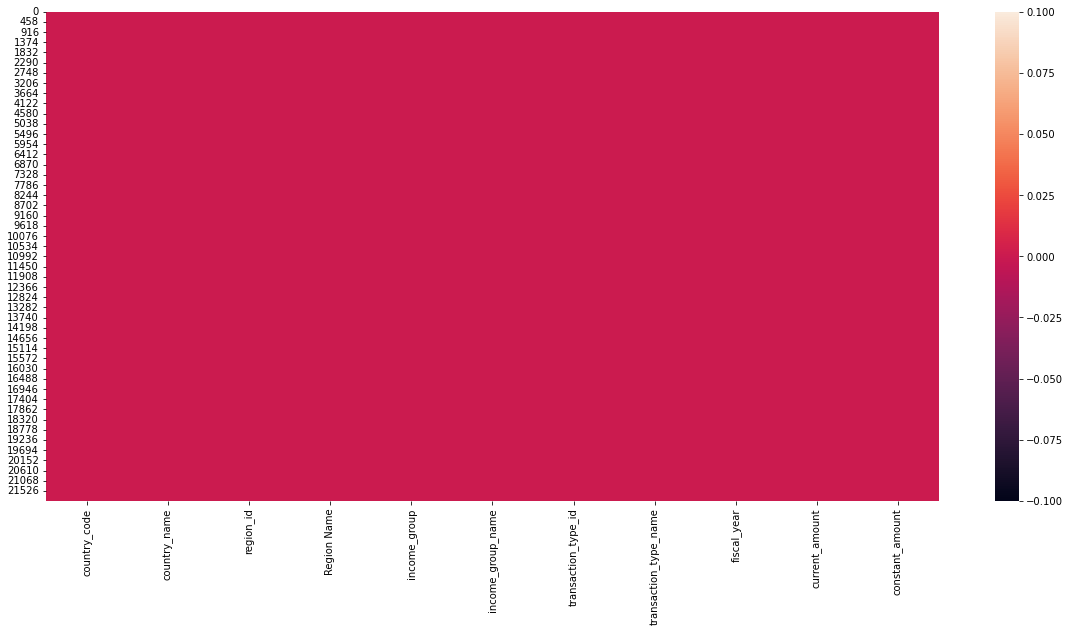

In [32]:
###using heatmap to confirm if there is still null values
sns.heatmap(aid.isnull())

### Data Analysis Using Pandas,Matplotlib and Seaborn

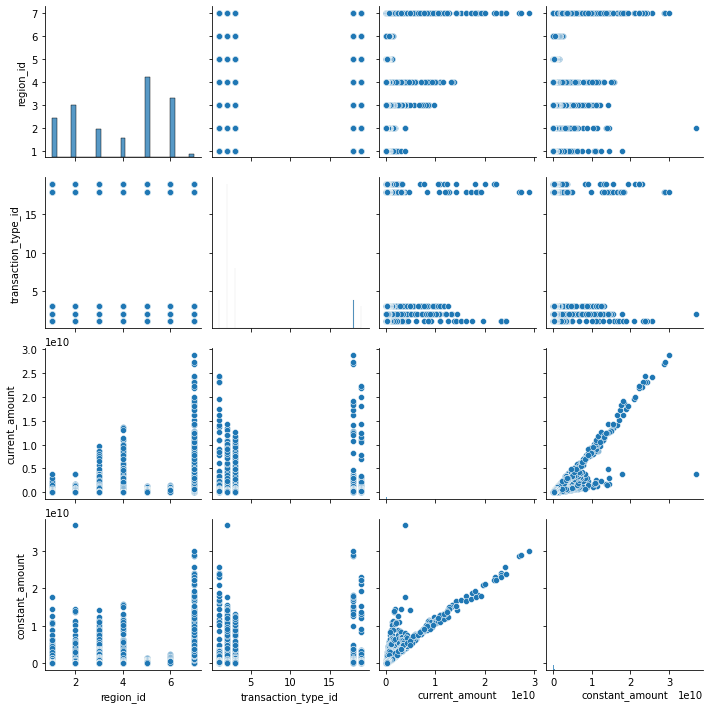

In [33]:
sns.pairplot(aid)

#Bottom 5 countries with the least amount of aid recieved

In [206]:
bottom_5_countries = aid.groupby("country_name")["current_amount"].aggregate(["sum","count"]).sort_values(by="sum",ascending=False).reset_index()[-5:]

<AxesSubplot:xlabel='country_name', ylabel='sum'>

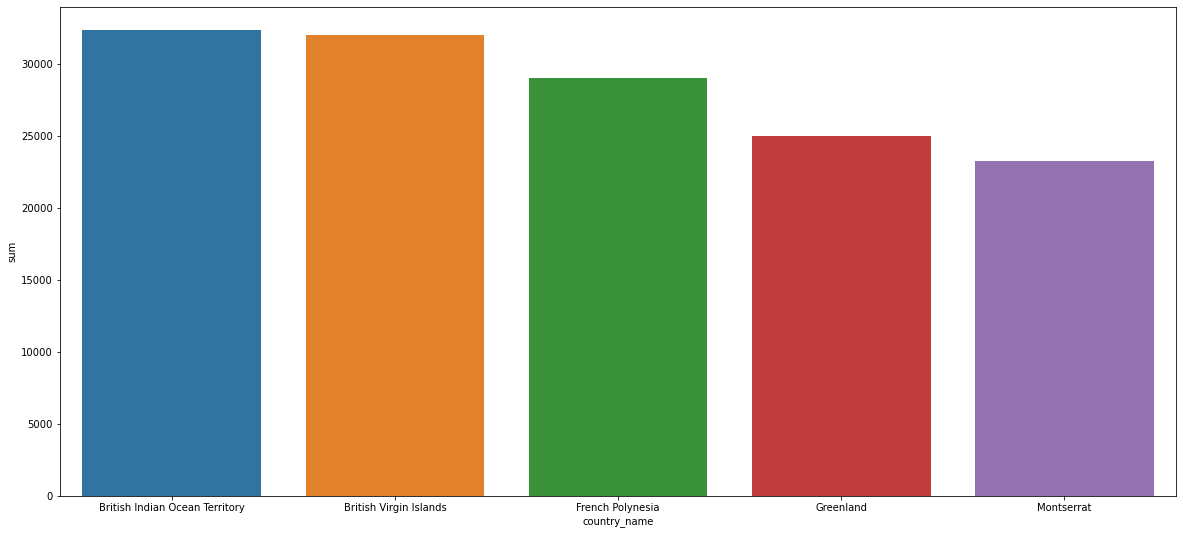

In [207]:
sns.barplot(x="country_name",y="sum",data=bottom_5_countries)

#Top 5 countries with the highest amount of aid

In [214]:
Top_5_countries = aid.groupby("country_name")["current_amount"].aggregate(["sum","count"]).sort_values(by="sum",ascending=False).reset_index()[:5]

<AxesSubplot:xlabel='country_name', ylabel='sum'>

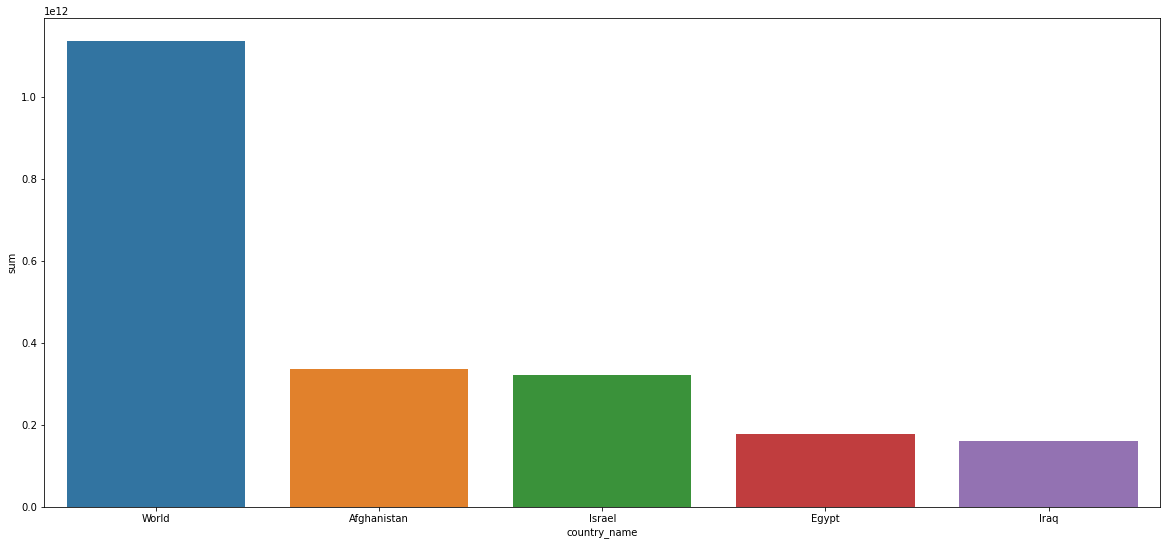

In [399]:
sns.barplot(x="country_name",y="sum",data=Top_5_countries)

# Transaction Type analysis

##### Most of the transactions are obligatory transactions

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_19164/3236104316.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  transaction_type_count = aid.groupby("transaction_type_name")["Region Name","current_amount"].count().reset_index()


([<matplotlib.patches.Wedge at 0x2bd843a5f70>,
 [Text(0.7315374107279088, 0.24031857336774207, 'Appropriated and Planned'),
  Text(0.20549565804954759, 0.7420724590784807, 'Disbursements'),
  Text(-0.4642611827173435, 0.6142976104640921, 'Initial Allocations'),
  Text(-0.46776674129390067, -0.6116324678589954, 'Obligations'),
  Text(0.7316747394650074, -0.23990013678364933, "President's Budget Requests")])

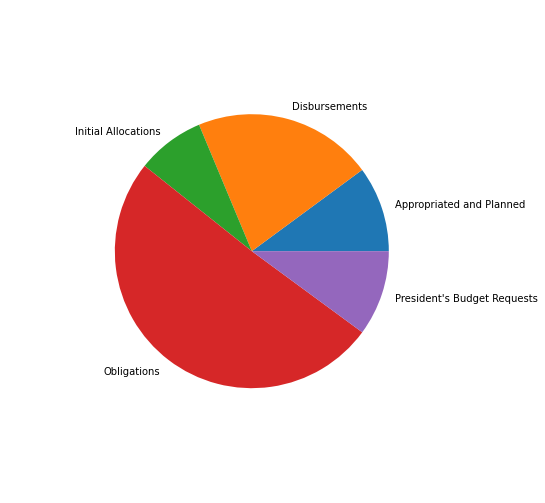

In [253]:
# Transaction Type by count
transaction_type_count = aid.groupby("transaction_type_name")["Region Name","current_amount"].count().reset_index()
plt.pie(x="current_amount",data=transaction_type_count,labels="transaction_type_name",radius=0.7)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_19164/3538870067.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  transaction_type = aid.groupby("transaction_type_name")["Region Name","current_amount"].sum().reset_index().sort_values(by="current_amount",ascending =False)


<AxesSubplot:xlabel='current_amount', ylabel='transaction_type_name'>

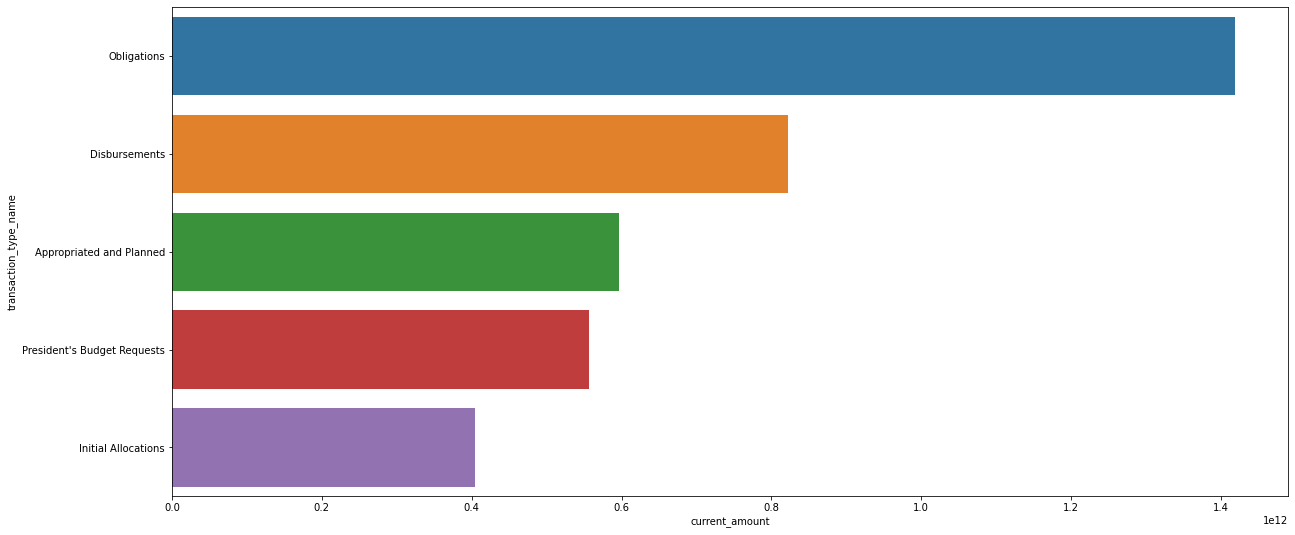

In [417]:

#  Transaction Type by Current amount
transaction_type = aid.groupby("transaction_type_name")["Region Name","current_amount"].sum().reset_index().sort_values(by="current_amount",ascending =False)

sns.barplot(x="current_amount",data=transaction_type,y="transaction_type_name")

# Regional Analysis

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region Name', ylabel='count'>

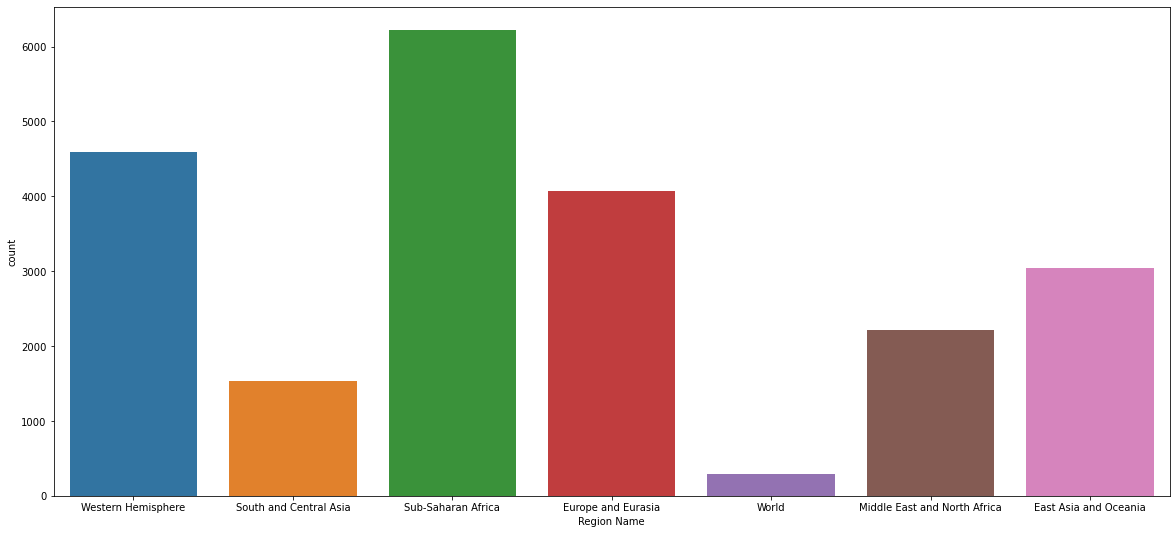

In [256]:
## Region sub-sahara african regions has the highes number of aid
sns.countplot("Region Name",data=aid)

In [272]:
regions = aid.groupby(["Region Name"])["current_amount"].aggregate(["sum","count"]).reset_index().sort_values(ascending=False,by="sum")
regions

,Region Name,sum,count
6,World,1146784071318,287
2,Middle East and North Africa,888548837247,2217
4,Sub-Saharan Africa,656390177758,6223
3,South and Central Asia,506909261474,1538
1,Europe and Eurasia,225109664705,4073
5,Western Hemisphere,211688817867,4597
0,East Asia and Oceania,161902136383,3038


<AxesSubplot:xlabel='sum', ylabel='Region Name'>

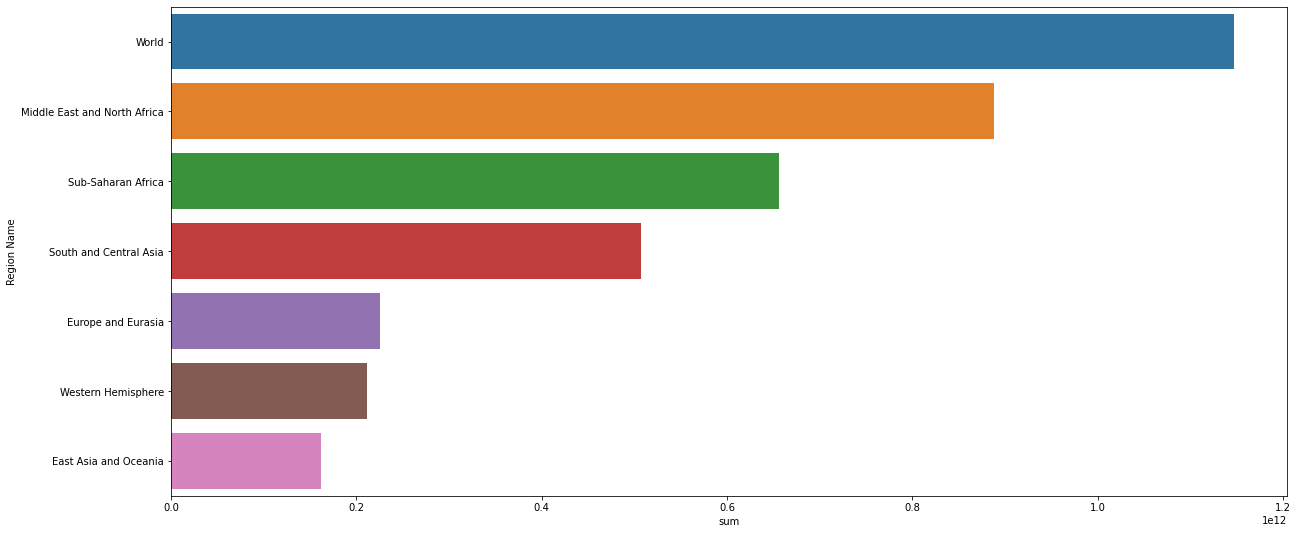

In [409]:
#More Money was sent to middle east asia and North Africa and sub sahara Africa
sns.barplot(x="sum",y="Region Name",data=regions,orient="horizontal")

# Income Type Analysis

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income_group_name', ylabel='count'>

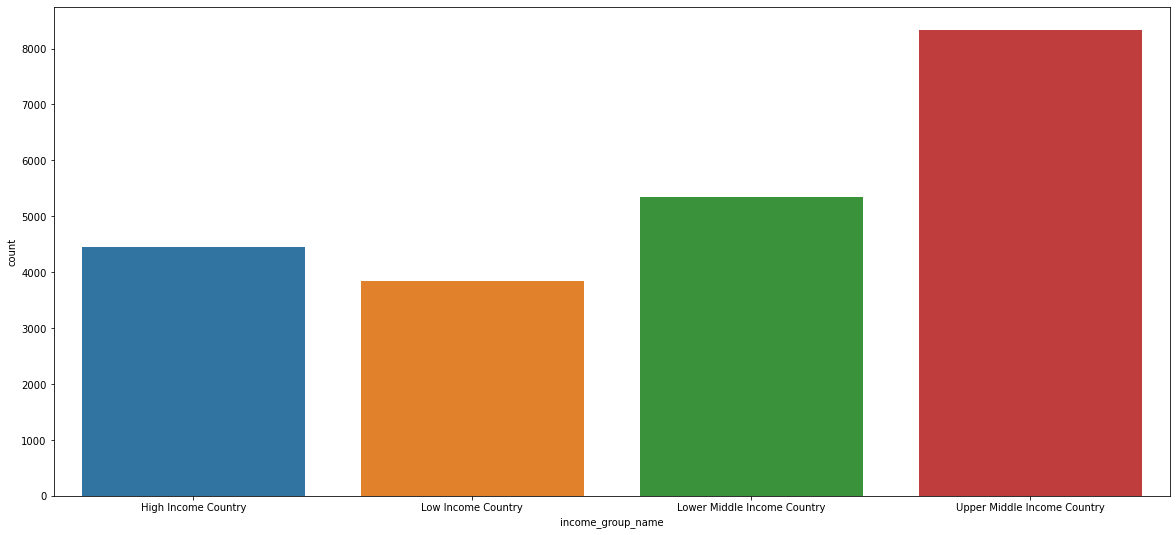

In [259]:
## Upper Middle Income Countries has the highest number of aid recieved
sns.countplot("income_group_name",data=aid)

In [486]:
income_group = aid.groupby(["income_group_name"])["current_amount"].aggregate(["sum","count"]).reset_index().sort_values(ascending=False,by="sum")


<AxesSubplot:xlabel='income_group_name', ylabel='sum'>

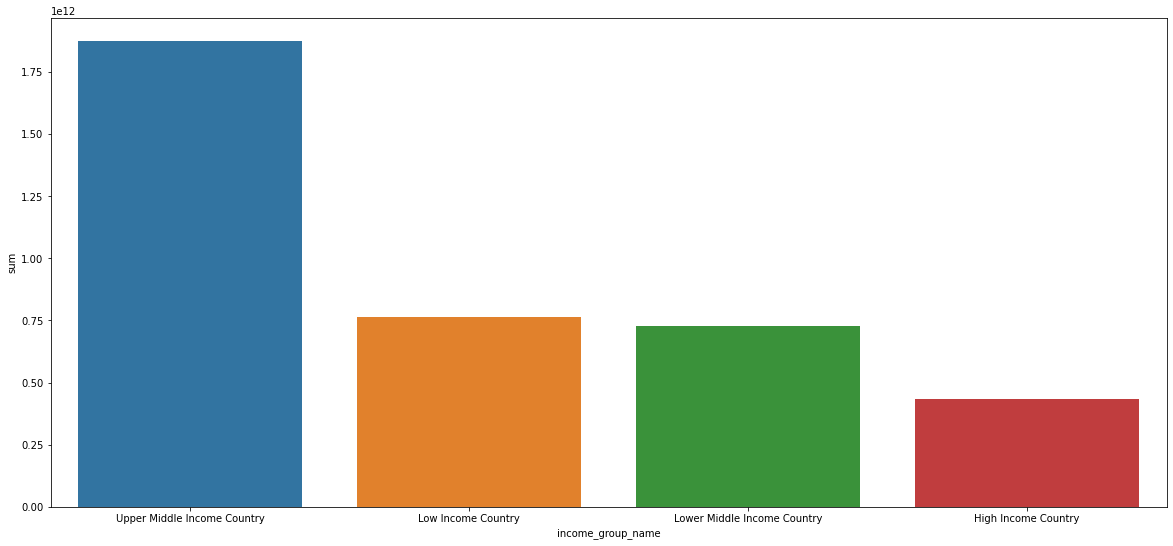

In [491]:
sns.barplot(x="income_group_name",y="sum",data=income_group)



# Yearly Review from 1990 to 2021

In [363]:
fiscal_year = aid.groupby(["fiscal_year"])["current_amount"].aggregate(["sum","count"]).reset_index().sort_values(ascending=False,by="sum")
fiscal_year["fiscal_year"] = fiscal_year["fiscal_year"].apply(lambda x: x[:4] if x =="1976tq" else x)

In [364]:
aid["fiscal_year"] = aid["fiscal_year"].apply(lambda x: x[:4] if x =="1976tq" else x)
aid["fiscal_year"]=aid["fiscal_year"].astype(int)

In [365]:
fiscal_year["fiscal_year"]=fiscal_year["fiscal_year"].astype(int)

<AxesSubplot:xlabel='fiscal_year', ylabel='sum'>

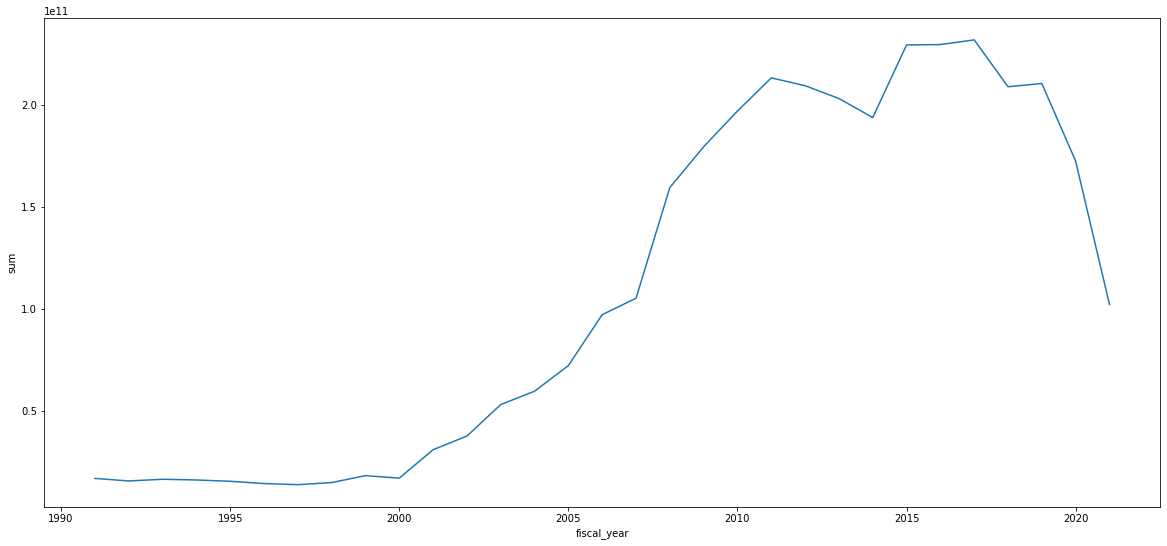

In [366]:
fiscal_year = fiscal_year[(fiscal_year["fiscal_year"] > 1990) & (fiscal_year["fiscal_year"] < 2022)].sort_values(by="fiscal_year")
sns.lineplot(x="fiscal_year",y="sum",data=fiscal_year)

## Sub-Saharan Africa Analysis

##Number of Countries

In [368]:
sahara_africa = aid[aid["Region Name"] =="Sub-Saharan Africa" ]

57 Countries makes up the sub-sahara african region

In [369]:
#List of Countries
sahara_africa["country_name"].unique()

array(['Angola', 'Burundi', 'Benin', 'Burkina Faso', 'Botswana',
       'Central African Republic', "Cote d'Ivoire", 'Cameroon',
       'Congo (Kinshasa)', 'Congo (Brazzaville)', 'Comoros', 'Cabo Verde',
       'Djibouti', 'Eastern Africa Region',
       'Eastern and Central Africa Region', 'Eritrea',
       'East and South Africa Region', 'Ethiopia', 'Gabon', 'Ghana',
       'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea',
       'British Indian Ocean Territory', 'Kenya', 'Liberia', 'Lesotho',
       'Madagascar', 'Mali', 'Mozambique', 'Mauritania', 'Mauritius',
       'Malawi', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Southern Africa Region', 'Sudan (former)', 'Sudan', 'Senegal',
       'Sierra Leone', 'Somalia', 'South Sudan',
       'Sub-Saharan Africa Region', 'Sao Tome and Principe', 'Eswatini',
       'Seychelles', 'Chad', 'Togo', 'Tanzania', 'Uganda',
       'West Africa Region', 'South Africa', 'Zambia', 'Zimbabwe'],
      dtype=object)

In [307]:
#Number of aid given to each african country
sahara_africa.country_name.value_counts()

Liberia                              141
Ethiopia                             139
Congo (Kinshasa)                     135
Ghana                                135
Kenya                                134
Sierra Leone                         133
Malawi                               132
Somalia                              131
Tanzania                             130
Uganda                               130
Guinea                               129
Togo                                 129
Madagascar                           129
Zambia                               129
Benin                                129
Cameroon                             128
Gambia                               128
Central African Republic             127
Mauritania                           127
Mali                                 127
Burundi                              127
Burkina Faso                         127
Senegal                              127
Cote d'Ivoire                        127
Niger           

<AxesSubplot:xlabel='fiscal_year', ylabel='sum'>

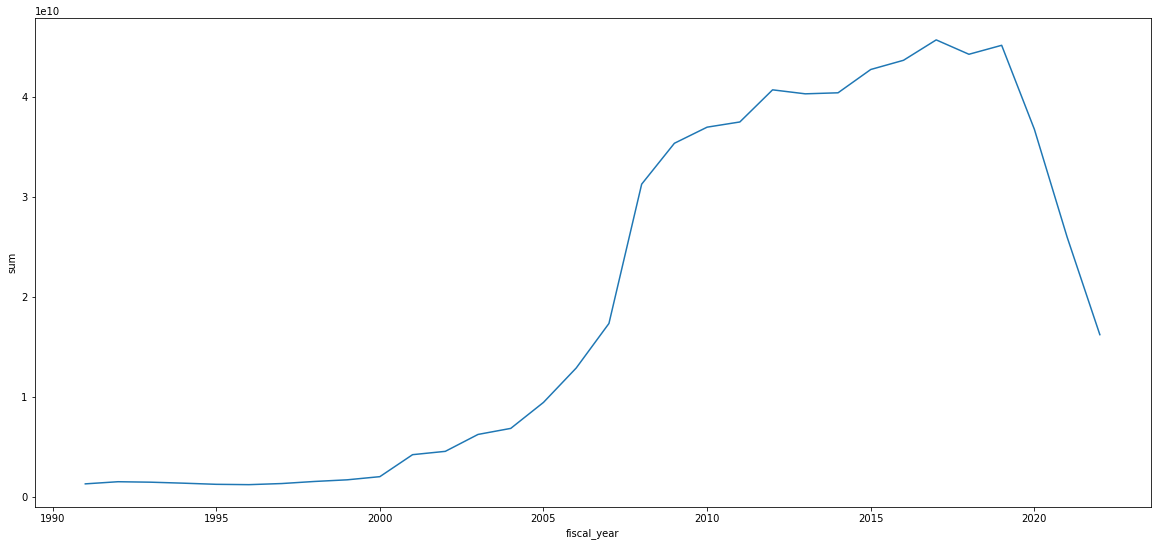

In [372]:

sahara_african_yearly = sahara_africa[sahara_africa["fiscal_year"]>1990].groupby("fiscal_year")["current_amount"].aggregate(["sum","count"]).reset_index()
sns.lineplot(x="fiscal_year",y="sum",data=sahara_african_yearly)

In [302]:
# Top 5 subsahara country with the highest amount of aid using current_amount
Top_5_sahara = sahara_africa.groupby("country_name")["current_amount"].aggregate(["sum","count"]).reset_index().sort_values(by="sum",ascending=False)[:5]
Top_5_sahara

,country_name,sum,count
21,Ethiopia,54678881215,139
27,Kenya,52694624681,134
38,Nigeria,44383847615,126
45,South Africa,38494957089,102
53,Uganda,38137011079,130


In [301]:
bottom_5_sahara = sahara_africa.groupby("country_name")["current_amount"].aggregate(["sum","count"]).reset_index().sort_values(by="sum",ascending=False)[-5:]
bottom_5_sahara

,country_name,sum,count
10,Comoros,54926077,104
18,Equatorial Guinea,37350018,65
15,East and South Africa Region,4506598,6
17,Eastern and Central Africa Region,3351604,13
3,British Indian Ocean Territory,32298,4


#most of the aid given to subsahara african were given to low income countries and were mostly obligatory payments

<AxesSubplot:ylabel='current_amount'>

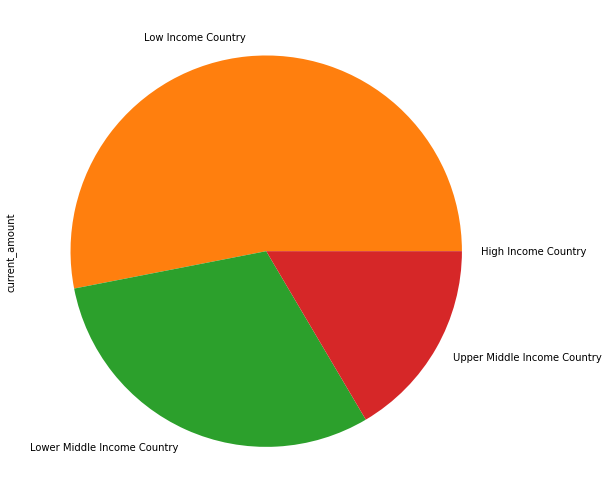

In [233]:
sahara_africa.groupby(["income_group_name"])["current_amount"].sum().plot(kind="pie")

<AxesSubplot:xlabel='transaction_type_name'>

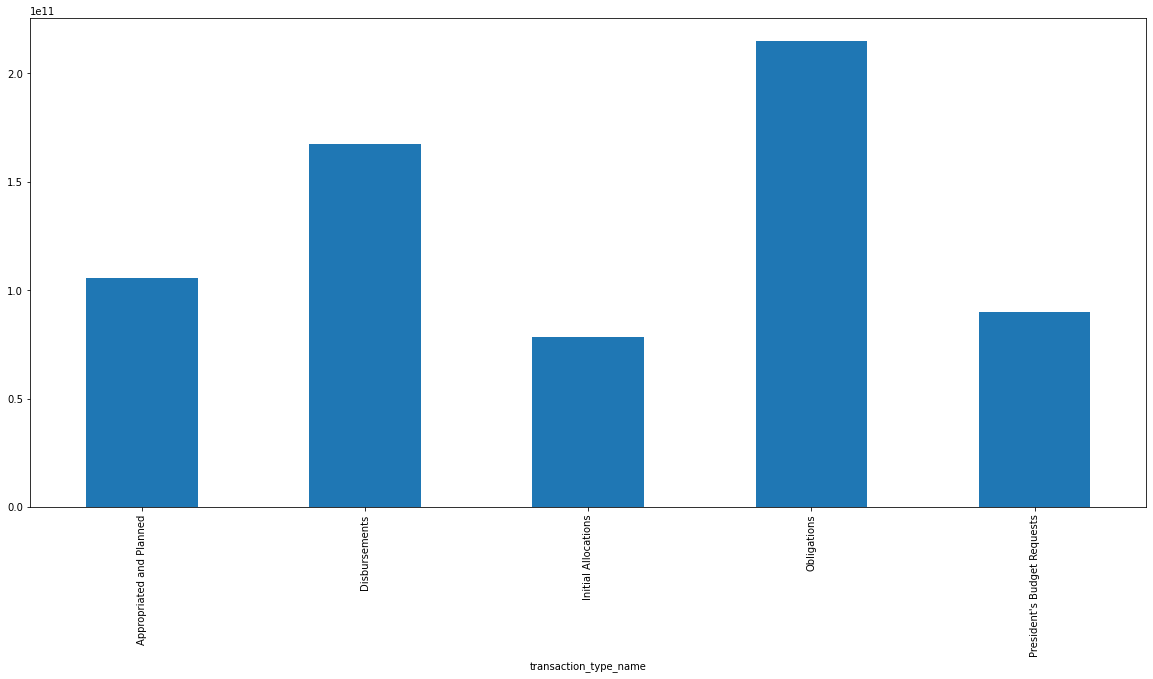

In [408]:

aid[aid["Region Name"]=="Sub-Saharan Africa"].groupby(["transaction_type_name"])["current_amount"].sum().plot(kind="bar",orientation="vertical")

Key takeaways:
1. Afganistan got the highest amount of aid while monestry got the lowest amount of aid
2. The most of the aid given by the USA is to the Upper-Middle income countries while low income countries receive the lowest share
3. There is no correlation between the number and the amount of aid given by USA
4. Most of the aids were provoded out of obligations
5. A majority of aids were given in the Middle East and North Africa region, followed by the Sub-Saharan Africa
6. Sub-Saharan Africa got the hight number of aid and second highest amount of aid recieved which were mostly given to the low income countries
7. 57 countries makes up the sub-Saharan Africa region
8. $656,390,177,758 amount was given on 6223 number of aid for the sub-Saharan Africa region
9. Ethopia was given the highest aid while British Indian Ocean Territory recieved the lowest amount of aid for the sub-Saharan Africa region
10. Sub-Saharan Africa aids were mostly obligatory though they were closely related to other transactions types